# Exploratary Analysis

In [4]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

from IPython.display import Image 
from IPython.core.display import HTML 
    
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library
from folium.plugins import FastMarkerCluster, MarkerCluster
print('Folium installed')
print('Libraries imported.')

%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.

Folium installed
Libraries imported.
Matplotlib version:  3.0.2


In [82]:
df = pd.read_csv("Total_Restaurants.csv")
dt= pd.read_csv("NY_SUBWAY_List.csv")
dtt = pd.read_csv("Toronto_SUBWAY_List.csv")

df.set_index("Location", inplace=True)
df_n=df.loc['New York']
df_t=df.loc['Toronto']
df=df.reset_index()
df_t=df_t.reset_index()
df_n=df_n.reset_index()
df.head()

,Location,Name,Category,Address,Latitude,Longitude,PostalCode,ID,Cost,Rating,Distance,People/km2,Borough
0,New York,Del Frisco's Double Eagle Steakhouse,Steakhouse,1221 Avenue of the Americas,40.759410,-73.982220,10020,4b0c24fef964a520be3723e3,4,9.3,102,14.0,Manhattan
1,New York,Artie's Steak and Seafood,Italian,394 City Island Ave,40.849542,-73.787317,10464,4514ed4df964a520e5391fe3,4,8.1,4268,536.0,Bronx
2,New York,City Island Diner,Cafe/Diner,304 City Island Ave,40.847238,-73.786245,10464,4b87d10cf964a5206ecd31e3,1,8.1,4188,536.0,Bronx
3,New York,Seafood City,Seafood,459 City Island Ave,40.850967,-73.789778,10464,4aa04654f964a520f33e20e3,2,8.4,4264,536.0,Bronx
4,New York,Kennedy's,American,406 Bayside,40.561360,-73.920932,11697,4b92907ef964a520c00434e3,2,8.0,3128,784.0,Brooklyn


# 1. Foliom map of New York Restaurants and Subway stations 

In [83]:
address = 'New York, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

# create map of Toronto using latitude and longitude values
map_NewYork = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, Station in zip(dt['Latitude'], dt['Longitude'], dt['Station']):
    label = '{}'.format(Station)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_NewYork) 
    
# add markers to map
for lat, lng, Name in zip(df_n['Latitude'], df_n['Longitude'], df_n['Name']):
    label = '{}'.format(Name)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.7,
        parse_html=False).add_to(map_NewYork)  
    
map_NewYork

#### First Obvservations are :
        1.Strongest concentraion of restaurants is in Manhattan 
        2.Restaurants are close to subway stations except for couple of pockets (West Queens ans SW Brooklynn)

# 2. Foliom map of New York Restaurants and Subway stations 

In [84]:
address = 'Toronto, Ontario'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

# create map of Toronto using latitude and longitude values
map_Toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, Station in zip(dtt['Latitude'], dtt['Longitude'], dtt['Station']):
    label = '{}'.format(Station)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Toronto) 
    
# add markers to map
for lat, lng, Name in zip(df_t['Latitude'], df_t['Longitude'], df_t['Name']):
    label = '{}'.format(Name)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Toronto)  
    
map_Toronto

#### Observations :
        1.Strongest concentraion of restaurants is in Donwtown Toronto 
        2.Restaurants are contracted laong the subway stations 
        3.
        

# 3. Dataframe comparing NewYork and Toronto Restaurants, Restaurants types, cost, rating and Distance to subway 

In [102]:
#Replacing restaurant types by neither Specialty or Ethnic
df_cat_set=df.loc[df.index,"Category"].replace({'Pizza':"Specialty",'Cafe/Diner':"Specialty",'Italian':"Ethnic",'Bakery':"Specialty",'American':"Ethnic", 
                                           'Japanese':"Ethnic",'Mexican':"Ethnic", 'Sandwiches':"Specialty", 'Sushi':"Specialty", 'Chinese':"Ethnic", 'Caribbean':"Ethnic",
                                           'Middle Eastern':"Ethnic", 'Seafood':"Specialty", 'Burgers':"Specialty", 'Bagels':"Specialty", 'Thai':"Ethnic", 
                                           'French':"Ethnic",'Indian':"Ethnic", 'Greek':"Ethnic", 'Deli ':"Specialty", 'Korean':"Ethnic", 
                                           'Vegetarian / Vegan':"Specialty",'BBQ':"Specialty",'Latin American':"Ethnic", 'Steakhouse':"Specialty", 'Asian':"Ethnic", 
                                           'Tapas':"Specialty", 'Donuts':"Specialty",'Vietnamese':"Ethnic", 'Gastropub':"Specialty", 'Salad':"Specialty", 'Tacos':"Specialty",'Turkish':"Ethnic",
                                           'Spanish':"Ethnic",'Dumplings':"Specialty", 'Eastern European':"Ethnic", 'Ramen':"Specialty", 'Mediterranean':"Ethnic", 'Falafel':"Specialty",
                                           'Cuban':"Ethnic", 'Fried Chicken':"Specialty", 'Ethiopian':"Ethnic", 'Southern':"Ethnic", 'Noodles':"Specialty",
                                           'Burritos':"Specialty", 'Filipino':"Ethnic", 'Fish & Chips':"Specialty", 'Venezuelan':"Ethnic", 'Indonesian':"Ethnic",
                                           'Brazilian':"Ethnic", 'Food Court':"Specialty", 'Deli':"Specialty", 'Peruvian':"Ethnic", 'Creperie':"Specialty", 'Cantonese':"Ethnic",
                                           'Snacks':"Specialty", 'Soup':"Specialty", 'German':"Ethnic", 'Portuguese':"Ethnic", 'Argentinian':"Ethnic", 'Austrian':"Ethnic",
                                           'Russian':"Ethnic", 'Israeli':"Ethnic", 'Malay':"Ethnic", 'Moroccan':"Ethnic", 'Colombian':"Ethnic", 'Sri Lankan':"Ethnic",
                                           'South American':"Ethnic", 'African':"Ethnic", 'Afghan':"Ethnic", 'Pie':"Specialty", 'Taiwanese':"Ethnic", 'Burmese':"Ethnic",
                                           'Pakistani':"Ethnic", 'Australian':"Ethnic", 'Mongolian':"Ethnic", 'Uzbek':"Ethnic"})
df.set_index("Location", inplace=True)
df_n=df.loc['New York']
df_t=df.loc['Toronto']
df=df.reset_index()
df['Category Set'] = df_cat_set.to_frame()
x=df_n['Category Set'].value_counts()
y=df_t['Category Set'].value_counts()


#Build new dataframe for total and mean using groupby
df1= pd.read_csv("Total_Restaurants.csv")
df1.set_index("Location", inplace=True)
df1=df.groupby(['Location'], as_index=False).agg({"Category": "count",'Rating':"mean",'Distance':"mean",'Cost':"mean",'People/km2':'mean'})
df1.rename(columns={'Category':'Restaurant Nb','Rating':'Rating Avg','Distance':'Distance Avg'}, inplace=True)
df1.loc[0,("Type Nb")]=df_n['Category'].value_counts().count()
df1.loc[1,("Type Nb")]=df_t['Category'].value_counts().count()
df1.loc[0,("Specialty/Ethnic types")]=str(x[0])+"/"+str(x[1])
df1.loc[1,("Specialty/Ethnic types")]=str(y[0])+"/"+str(y[1])

df1.set_index("Location", inplace=True)

#Build new dataframe for median using groupby 
df2=df.groupby(['Location'], as_index=False).agg({'Rating':"median",'Distance':"median"})
df2.set_index("Location", inplace=True)

#Merging two dataframes
df3=df1.join(df2)
df3.rename(columns={'Distance Avg':'Average Distance to Subway(in m)',
                    'Rating Avg':'Rating Average','Restaurant Nb':'Number of restaurants',
                    'Type Nb':'Number of restaurant types','Rating':'Rating Median',
                    'Distance':'Median Distance to Subway(in m)','Cost':'Cost Average','People/km2':'Density Average'}, inplace=True)
df3=df3[['Number of restaurants','Number of restaurant types',
         "Specialty/Ethnic types",'Cost Average','Rating Average','Rating Median','Density Average','Average Distance to Subway(in m)','Median Distance to Subway(in m)']].round({'Density Average':1,'Cost Average':2,'Rating Average':1,'Average Distance to Subway(in m)':2}).transpose()
df3.rename(columns={0:'New York',1:'Toronto'}, inplace=True)
df3

Location,New York,Toronto
Number of restaurants,716,369
Number of restaurant types,63,57
Specialty/Ethnic types,367/349,194/175
Cost Average,1.87,1.81
Rating Average,8.9,8.4
Rating Median,9.1,8.5
Density Average,18144.4,6119.1
Average Distance to Subway(in m),335.26,626.29
Median Distance to Subway(in m),190.5,394


# 4.Distance to Subway
   ##    Analysing Distance to subway using Box Plot

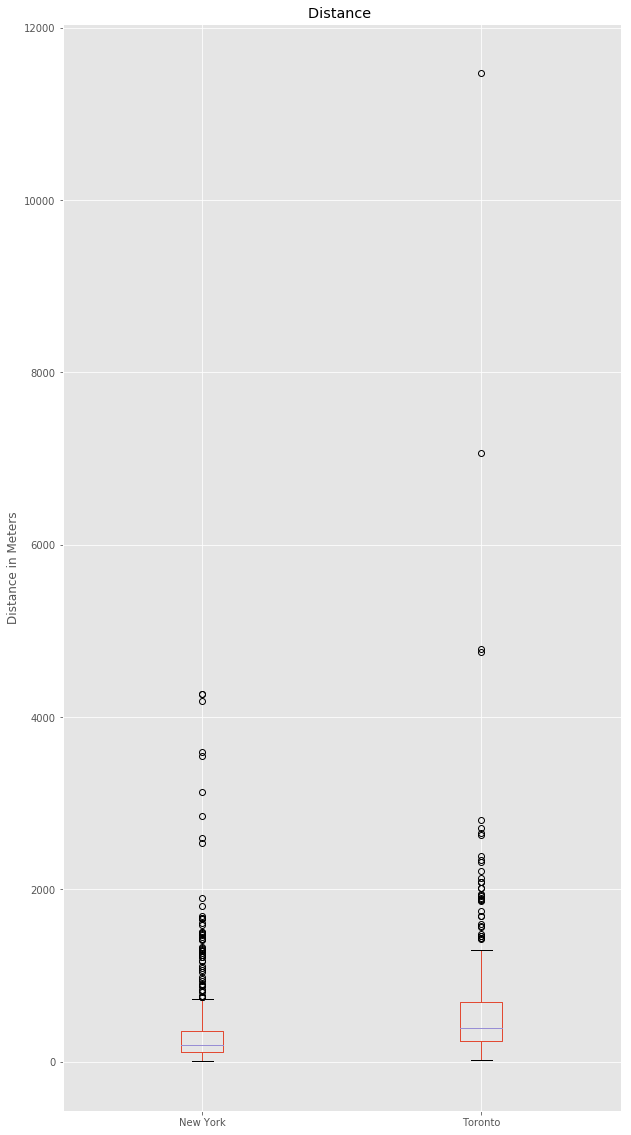

In [87]:
df_Box_Plot= df[['Distance','Location']]
df_Box_Plot.set_index("Location", inplace=True)
df_Box_TO=df_Box_Plot.loc['Toronto']
df_Box_NY=df_Box_Plot.loc['New York']
df_Box_TO=df_Box_TO.reset_index()
df_Box_NY=df_Box_NY.reset_index()
df_Box_TO=df_Box_TO.iloc[:,1].to_frame()
df_Box_NY=df_Box_NY.iloc[:,1].to_frame()
df_Box_TO.rename(columns={'Distance':'Toronto'}, inplace=True)
df_Box_NY.rename(columns={'Distance':'New York'}, inplace=True)
df_Box =df_Box_NY.join(df_Box_TO)
df_Box.plot(kind='box', figsize=(10, 20))
plt.title('Distance ')
plt.ylabel('Distance in Meters')
plt.show()

### Removing ouliers for both cities

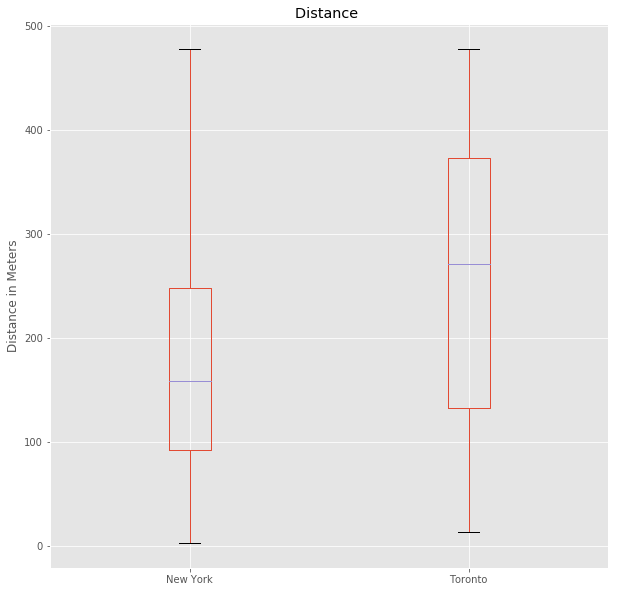

In [88]:
df_Box_Plot2= df[['Distance','Location']]
df_Box_Plot2=df_Box_Plot2[(df_Box_Plot2["Distance"] < 480)]
df_Box_Plot2.set_index("Location", inplace=True)
df_Box_TO2=df_Box_Plot2.loc['Toronto']
df_Box_NY2=df_Box_Plot2.loc['New York']
df_Box_TO2=df_Box_TO2.reset_index()
df_Box_NY2=df_Box_NY2.reset_index()
df_Box_TO2=df_Box_TO2.iloc[:,1].to_frame()
df_Box_NY2=df_Box_NY2.iloc[:,1].to_frame()
df_Box_TO2.rename(columns={'Distance':'Toronto'}, inplace=True)
df_Box_NY2.rename(columns={'Distance':'New York'}, inplace=True)
df_Box2 =df_Box_NY2.join(df_Box_TO2)
df_Box2.plot(kind='box', figsize=(10, 10))
plt.title('Distance ')
plt.ylabel('Distance in Meters')
plt.show()

#### Observations :
        1.
        2.
        3.

# 5. Cost
   ## Analysing NewYork and Toronto Restaurants cost range using Pie chart

In [89]:
#Cost range percentage per Location
df_t_cost=df_t['Cost'].value_counts().to_frame()
df_n_cost=df_n['Cost'].value_counts().to_frame()
df_n_cost.rename(columns={'Cost':'New York'}, inplace=True)
df_t_cost.rename(columns={'Cost':'Toronto'}, inplace=True)
df_n_cost=round((df_n_cost/(df3.iloc[0,0]))*100,2)
df_t_cost=round((df_t_cost/(df_t_cost.sum()))*100,2)
df_cost =df_t_cost.join(df_n_cost)
df_cost=df_cost.transpose()
df_cost.rename(columns={1:'Cheap',2:'Moderate',3:'Expensive',4:'Very Expensive'}, inplace=True)
df_cost=df_cost[['Cheap','Moderate','Expensive','Very Expensive']].transpose()

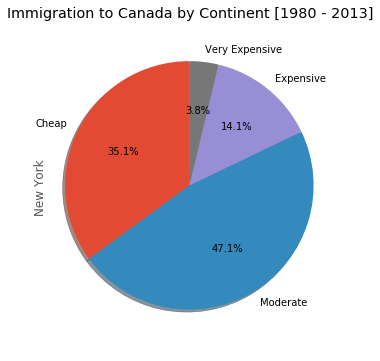

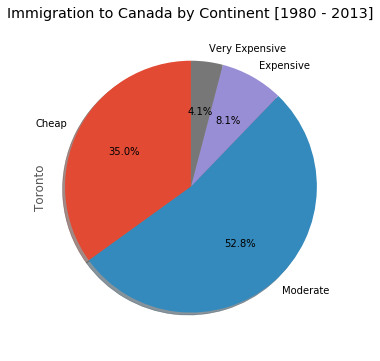

In [90]:

df_cost['New York'].plot(kind='pie',
                            figsize=(5, 6),
                            autopct='%1.1f%%', # add in percentages
                            startangle=90,     # start angle 90° (Africa)
                            shadow=True,       # add shadow      
                            )

plt.title('Immigration to Canada by Continent [1980 - 2013]')
plt.axis('equal') # Sets the pie chart to look like a circle.

plt.show()

df_cost['Toronto'].plot(kind='pie',
                            figsize=(5, 6),
                            autopct='%1.1f%%', # add in percentages
                            startangle=90,     # start angle 90° (Africa)
                            shadow=True,       # add shadow      
                            )

plt.title('Immigration to Canada by Continent [1980 - 2013]')
plt.axis('equal') # Sets the pie chart to look like a circle.

plt.show()

#### Observations :
        1.
        2.
        3.

## Dataframe comparing NewYork and Toronto Expensive Restaurants density and distance to subway 

In [91]:
#The expensive cost % for New York is almost double (while is almost equal for the other cost brackets) compared to Toronto -- Let's investigate
df = pd.read_csv("Total_Restaurants.csv")
df_ex=df.set_index("Cost")
df_exp=df_ex.loc[[3,4]]
df_exp=df_exp[['Location','Distance','People/km2']]
df_exp=df_exp.set_index("Location")
Mean_exp=pd.DataFrame(
    {
        "City":["New York","Toronto"],
         "Distance Mean":[((df_exp.loc['New York']['Distance']).mean()),((df_exp.loc['Toronto']['Distance']).mean())],
        "Restaurant Number":[((df_exp.loc['New York']['Distance']).value_counts().count())/(df3.loc["Number of restaurants","New York"]),((df_exp.loc['Toronto']['Distance']).value_counts().count())/((df3.loc["Number of restaurants","New York"]))],
        "Distance Median":[((df_exp.loc['New York']['Distance']).median()),((df_exp.loc['Toronto']['Distance']).median())],
        "Density Mean":[((df_exp.loc['New York']['People/km2']).mean()),((df_exp.loc['Toronto']['People/km2']).mean())],
    })
Mean_exp.transpose()

,0,1
City,New York,Toronto
Distance Mean,268.32,511.267
Restaurant Number,0.148045,0.0572626
Distance Median,158,410
Density Mean,21066,6832.47


## Chart showing Restaurants in common type average cost between Toronto and New York

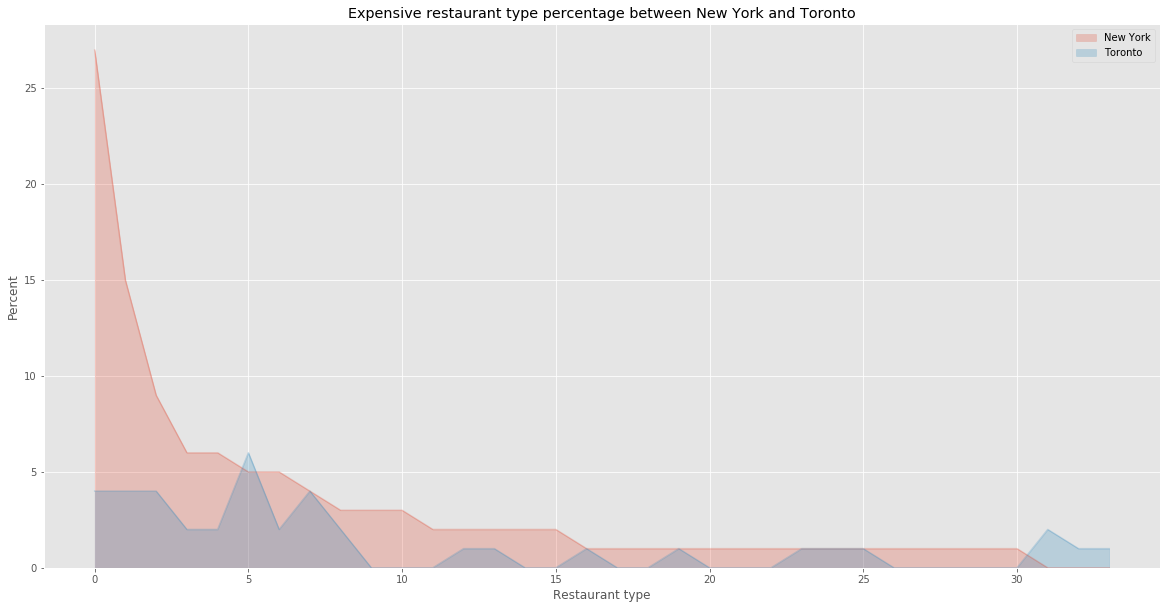

In [105]:
#Expensive restaurant type percentage between New York and Toronto
df = pd.read_csv("Total_Restaurants.csv")
df_Cost_Type=df[["Location","Category","Cost"]]
df_Cost_Type2=df_Cost_Type.set_index("Location")

df_Cost_TypeNY=df_Cost_Type2.loc["New York"]
df_Cost_TypeNY=df_Cost_TypeNY.set_index("Cost").loc[[3,4]]
df_Cost_TypeNY=df_Cost_TypeNY['Category'].value_counts().to_frame()
df_Cost_TypeTO=df_Cost_Type2.loc["Toronto"]
df_Cost_TypeTO=df_Cost_TypeTO.set_index("Cost").loc[[3,4]]
df_Cost_TypeTO=df_Cost_TypeTO['Category'].value_counts().to_frame()
df_Cost_TypeNY.rename(columns={'Category':'New York'}, inplace=True)
df_Cost_TypeTO.rename(columns={'Category':'Toronto'}, inplace=True)
df_CostCat = pd.concat([df_Cost_TypeNY, df_Cost_TypeTO], axis=1, sort=False)
df_CostCat=df_CostCat.fillna(value=0)
df_CostCat=df_CostCat.reset_index()

for i in range(len(df_CostCat)):
    df_CostCat.loc[i,'New York']=round(df_CostCat.loc[i,'New York']/df_CostCat['New York'].sum()*100)
    df_CostCat.loc[i,'Toronto']=round(df_CostCat.loc[i,'Toronto']/df_CostCat['New York'].sum()*100)

df_CostCat.plot(kind='area', 
             alpha=0.25, # 0-1, default value a= 0.5
             stacked=False,
             figsize=(20, 10),
            )
plt.title('Expensive restaurant type percentage between New York and Toronto')
plt.ylabel('Percent')
plt.xlabel('Restaurant type')
plt.show()


# 6. Restaurant Type

## Chart showing Restaurants common types number between Toronto and New York

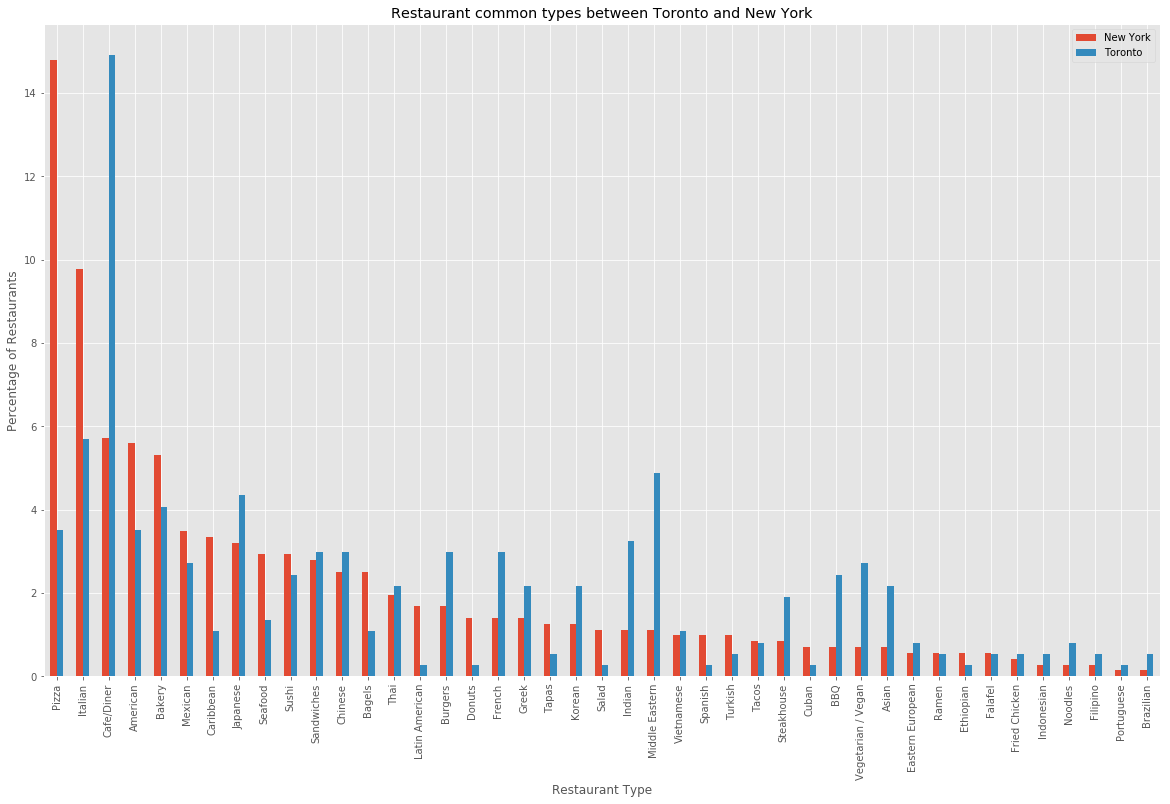

In [103]:
df_t_cat=df_t['Category'].value_counts().to_frame()
df_n_cat=df_n['Category'].value_counts().to_frame()
df_n_cat_index=df_n_cat.index
df_t_cat_index=df_t_cat.index
Common_Cat=df_n_cat_index.intersection(df_t_cat_index)
cat= pd.DataFrame()

for i in range(len(Common_Cat)):
    cat.loc[i,'Category']=Common_Cat[i]
    cat.loc[i,'New York']=round((((df_n_cat.loc[Common_Cat[i]][0])/(df_n_cat['Category'].sum()))*100),2)
    cat.loc[i,'Toronto']=round((((df_t_cat.loc[Common_Cat[i]][0])/(df_t_cat['Category'].sum()))*100),2)
cat.set_index("Category", inplace=True)

cat.plot(kind='bar', figsize=(20, 12))
plt.xlabel('Restaurant Type') # add to x-label to the plot
plt.ylabel('Percentage of Restaurants') # add y-label to the plot
plt.title('Restaurant common types between Toronto and New York') # add title to the plot
plt.show()

## Chart showing Restaurants in common type average cost between Toronto and New York

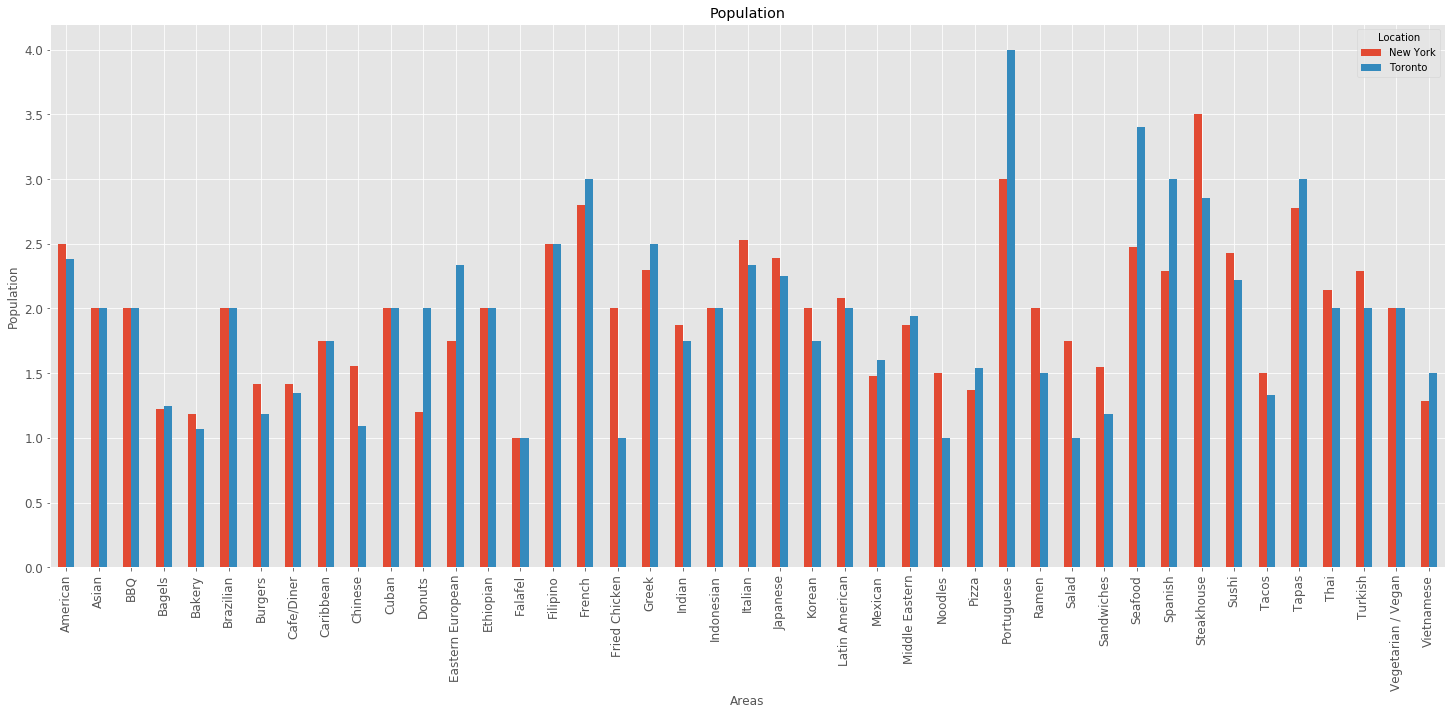

In [104]:
#pivot table avg cost per restaurant type
table = pd.pivot_table(df, values='Cost', index=['Category'],columns=['Location'], aggfunc=np.mean)
table=table.dropna()
cato=table.index
cato.to_frame()

plt.style.use('ggplot')
ax = table.plot(kind='bar', title ="Population",figsize=(25,10),legend=True, fontsize=12)
ax.set_xlabel("Areas",fontsize=12)
ax.set_ylabel("Population",fontsize=12)
plt.show()